<a href="https://colab.research.google.com/github/Placide250/OC-Learning-courses-2025/blob/main/stationary_v_non_stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

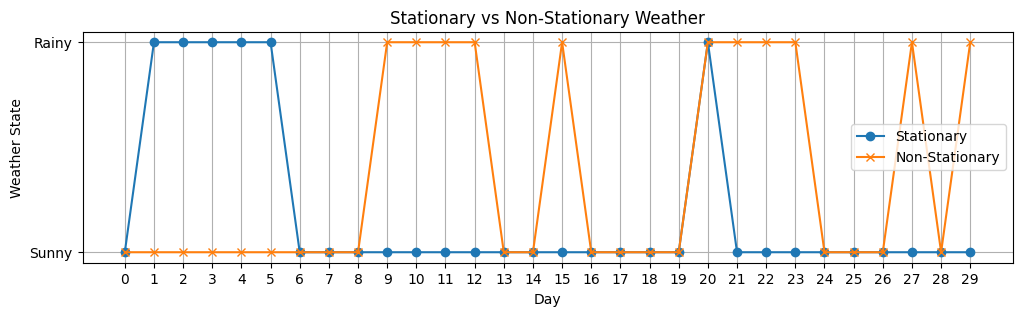

In [6]:
import random
import matplotlib.pyplot as plt

def simulate_weather(start_state, transitions, days, non_stationary=False):
    state = start_state
    history = [state]


    for day in range(1, days):
        if non_stationary:
            if day < 10:
                probs = transitions[0][state]
            elif day < 20:
                probs = transitions[1][state]
            else:
                probs = transitions[2][state]
        else:
            probs = transitions[state]

        next_state = random.choices(list(probs.keys()), weights=list(probs.values()))[0]
        history.append(next_state)
        state = next_state

    return history

# Simulate
stationary_weather = simulate_weather("Sunny", transitions_stationary, 30)
nonstationary_weather = simulate_weather("Sunny", transitions_nonstationary, 30, non_stationary=True)

# Plotting
plt.figure(figsize=(12, 3))
plt.plot(stationary_weather, label="Stationary", marker="o")
plt.plot(nonstationary_weather, label="Non-Stationary", marker="x")
plt.xticks(range(30))
plt.xlabel("Day")
plt.ylabel("Weather State")
plt.title("Stationary vs Non-Stationary Weather")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Define transition probabilities for stationary weather
transitions_stationary = {
    "Sunny": {"Sunny": 0.8, "Rainy": 0.2},
    "Rainy": {"Sunny": 0.3, "Rainy": 0.7}
}

# Define transition probabilities for non-stationary weather (changing over time)
transitions_nonstationary = [
    { # First 10 days
        "Sunny": {"Sunny": 0.9, "Rainy": 0.1},
        "Rainy": {"Sunny": 0.4, "Rainy": 0.6}
    },
    { # Days 10-20
        "Sunny": {"Sunny": 0.7, "Rainy": 0.3},
        "Rainy": {"Sunny": 0.2, "Rainy": 0.8}
    },
    { # Days 20-30
        "Sunny": {"Sunny": 0.5, "Rainy": 0.5},
        "Rainy": {"Sunny": 0.1, "Rainy": 0.9}
    }
]

In [8]:
import random

# Define transition probabilities (Markov assumption: next state depends only on current state)
simple_transitions = {
    "A": {"A": 0.7, "B": 0.3},
    "B": {"A": 0.4, "B": 0.6}
}

def simulate_simple_markov(start_state, transitions, steps):
    """
    Simulates a simple Markov chain.

    Args:
        start_state (str): The initial state.
        transitions (dict): A dictionary of transition probabilities.
        steps (int): The number of steps to simulate.

    Returns:
        list: A list of states representing the simulation history.
    """
    state = start_state
    history = [state]

    for _ in range(steps):
        # Get probabilities for the next state based ONLY on the current state
        probs = transitions[state]
        next_state = random.choices(list(probs.keys()), weights=list(probs.values()))[0]
        history.append(next_state)
        state = next_state

    return history

# Simulate a simple Markov chain for 10 steps starting from state "A"
simple_simulation = simulate_simple_markov("A", simple_transitions, 10)
print("Simple Markov Chain Simulation:", simple_simulation)

Simple Markov Chain Simulation: ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B']
